In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


In [3]:
dataset = pd.read_csv('data/only2_big_with_sf.csv')
dataset.set_index('cell_line', inplace=True)
dataset.head()

,7105,8813,57147,55732,2268,3075,2519,2729,4800,90529,...,8336,84311,126661,79447,283521,29122,9997,388963,6905,SF
cell_line,,,,,,,,,,,,,,,,,,,,,
NCIH1568-2,5.626439,6.855242,2.185867,4.079805,0.084064,0.176323,6.824513,4.956521,3.766595,2.298658,...,0.622930,5.373996,1.956057,5.482203,0.422233,0.176323,0.918386,1.778209,4.050502,0.607940
SCC9-2,3.964399,5.718088,2.260026,3.451541,0.084064,0.782409,6.039796,5.778734,4.903038,2.711495,...,1.536053,5.042207,2.344828,3.937344,0.000000,0.042644,2.475085,1.176323,4.174726,0.573035
HCC1428-2,4.002703,5.870365,3.621759,3.861955,0.014355,0.485427,4.614121,5.286881,4.429616,3.442280,...,3.033863,4.539159,1.970854,5.895303,0.622930,0.014355,0.918386,2.244887,5.555816,0.450188
U2OS-2,5.098453,6.543496,2.117695,4.115200,0.014355,0.432959,5.684258,4.847997,5.108524,2.189034,...,0.176323,5.028569,2.967169,4.995937,0.111031,0.042644,2.010780,1.925999,4.635754,0.526517
LU99-2,3.665620,6.716717,2.100978,4.176323,0.000000,1.263034,6.124948,4.395063,5.070389,2.669027,...,1.321928,6.613679,1.438293,4.349082,0.000000,0.111031,1.111031,1.632268,5.197315,0.625161


In [4]:
dataset.isna().sum()

7105      0
8813      0
57147     0
55732     0
2268      0
         ..
29122     0
9997      0
388963    0
6905      0
SF        0
Length: 15140, dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

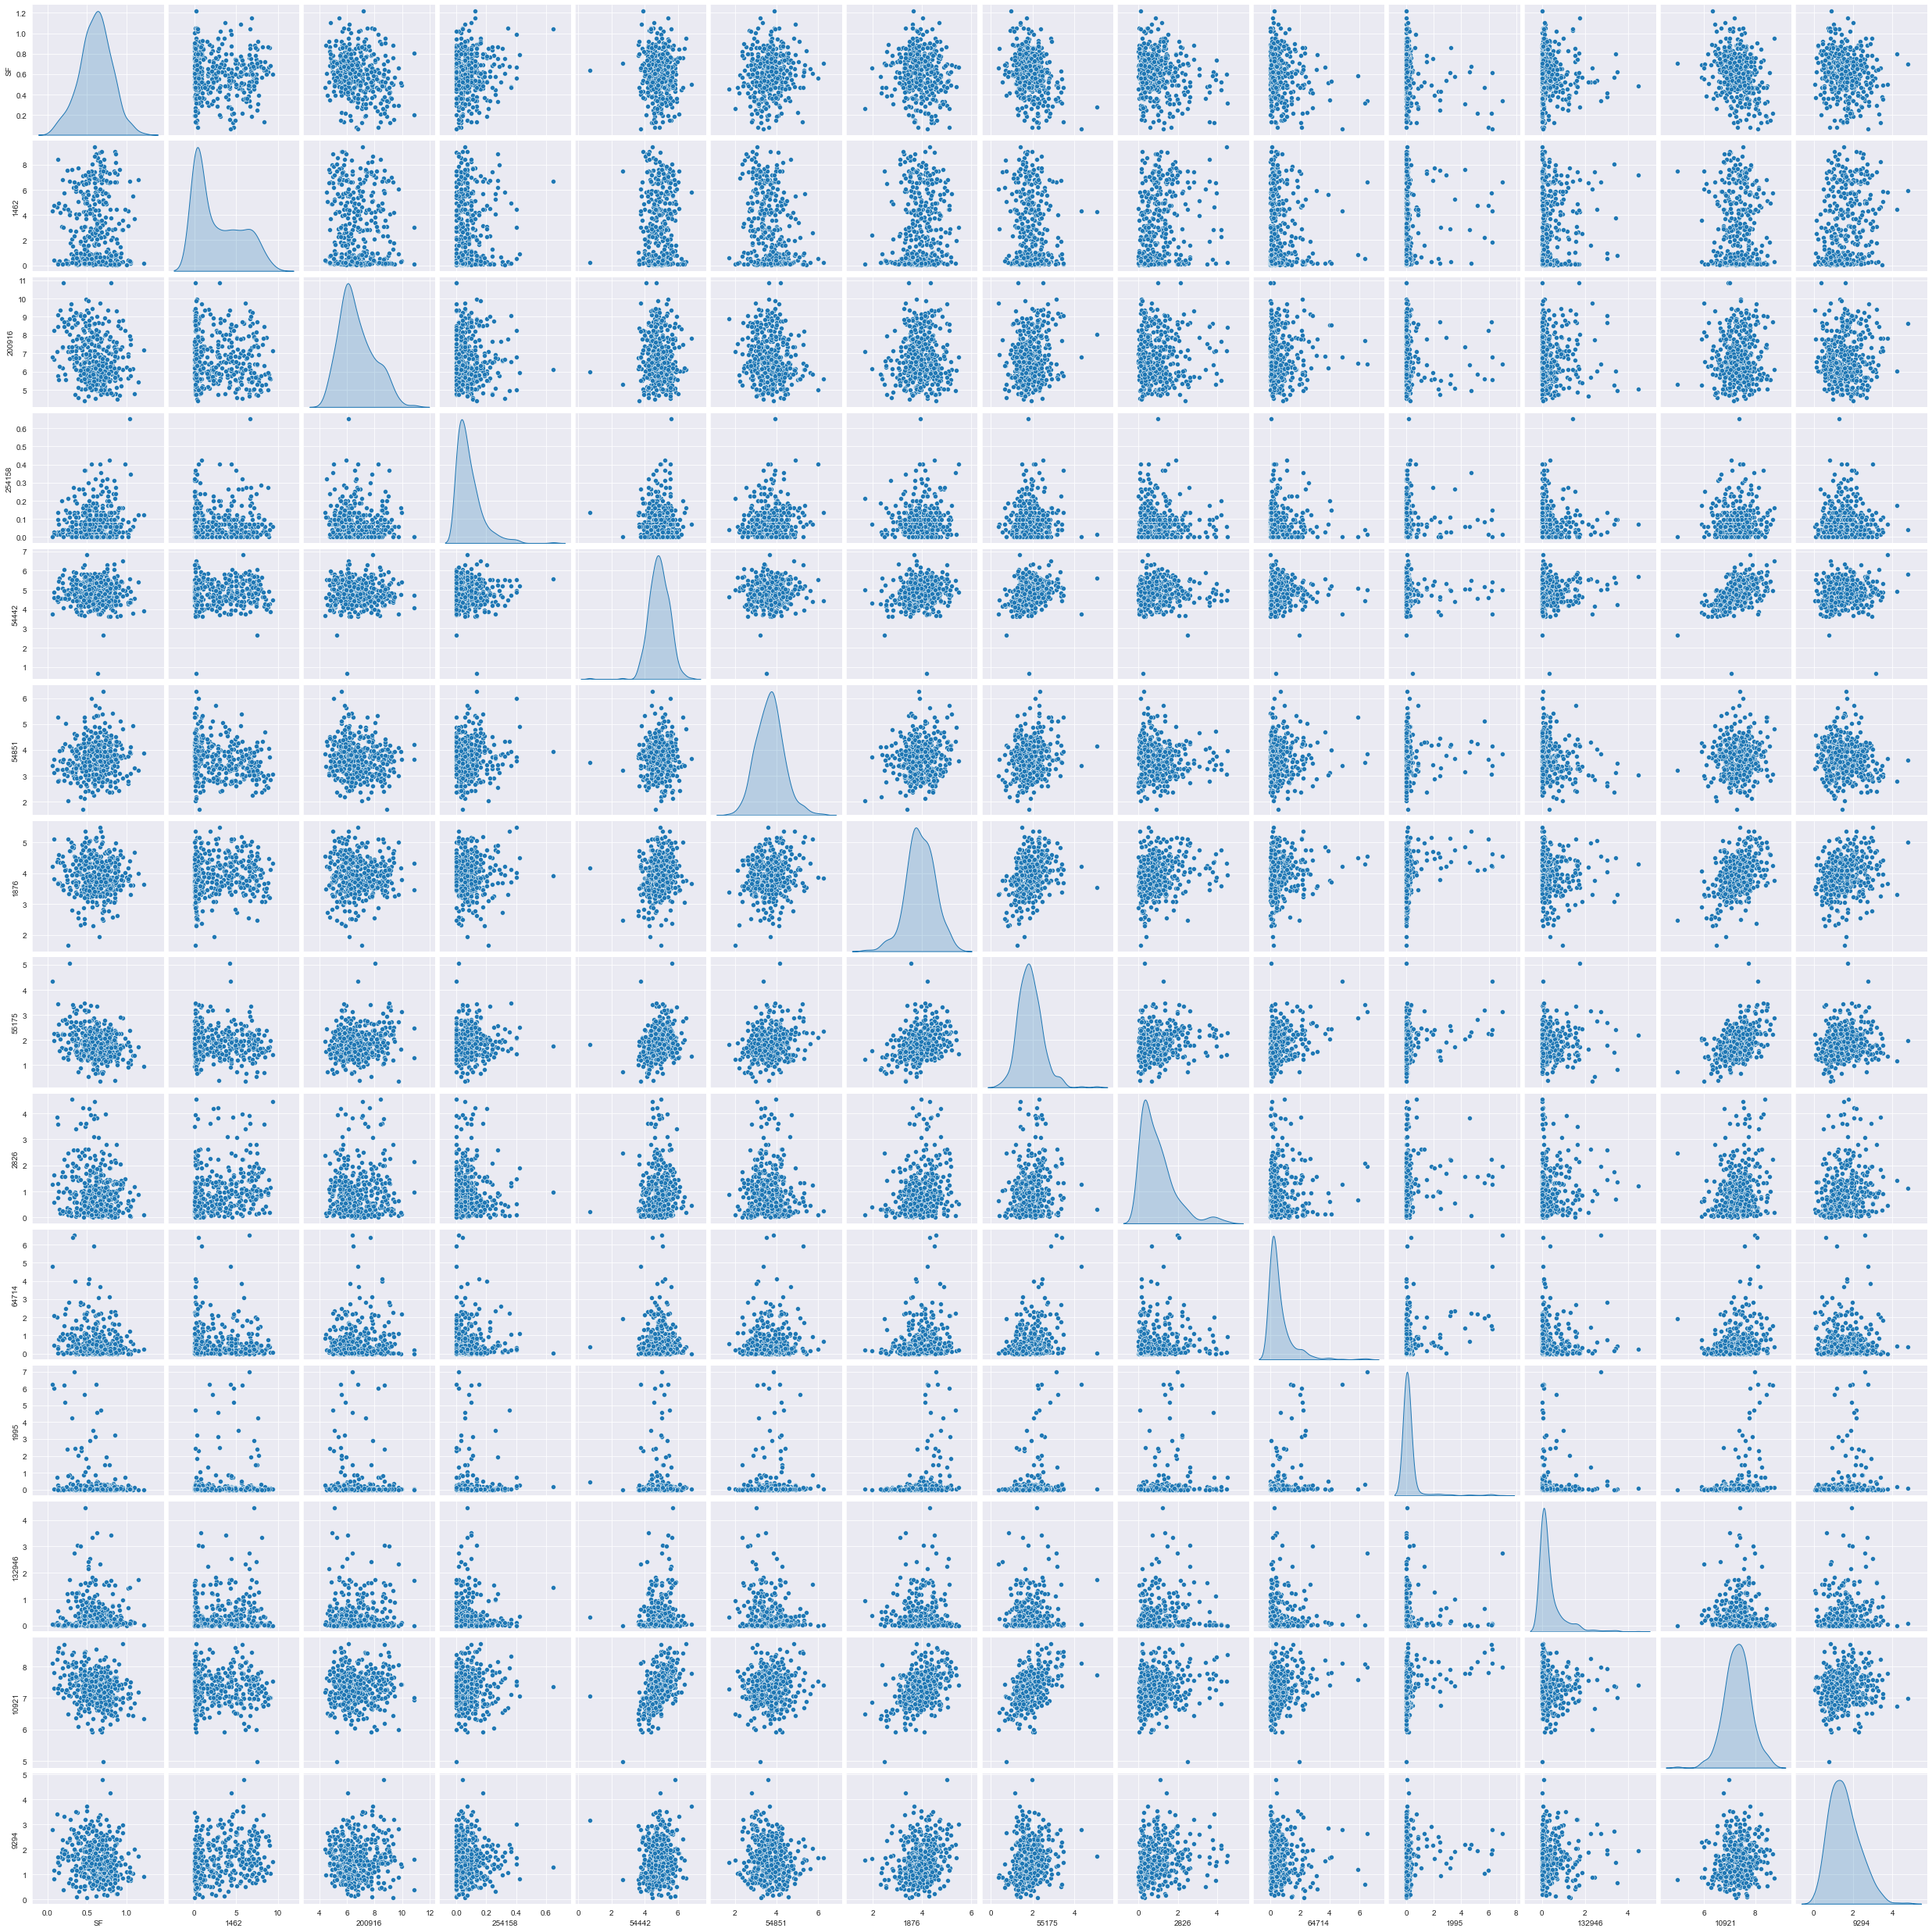

In [7]:
sns.pairplot(train_dataset[['SF', '1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946', '10921', '9294']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
7105,420.0,4.462014,1.054285,0.124328,3.902074,4.575010,5.085650,7.465648
8813,420.0,6.439521,0.549833,4.897724,6.051697,6.434294,6.767456,8.061074
57147,420.0,2.345936,0.534552,1.035624,1.970854,2.300123,2.635174,4.760753
55732,420.0,3.740166,0.645132,1.510962,3.354732,3.799594,4.139347,5.634593
2268,420.0,0.101954,0.229839,0.000000,0.014355,0.042644,0.097611,3.300124
...,...,...,...,...,...,...,...,...
29122,420.0,0.118214,0.337862,0.000000,0.000000,0.014355,0.070389,3.280956
9997,420.0,1.547653,0.686422,0.000000,1.077243,1.553358,1.991854,5.099295
388963,420.0,1.495706,0.763440,0.042644,0.914549,1.448891,1.982765,3.926948
6905,420.0,4.811650,0.567755,3.155425,4.455985,4.808128,5.196135,6.524816


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SF')
test_labels = test_features.pop('SF')

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
7105,4.462014,1.054285
8813,6.439521,0.549833
57147,2.345936,0.534552
55732,3.740166,0.645132
2268,0.101954,0.229839
...,...,...
29122,0.118214,0.337862
9997,1.547653,0.686422
388963,1.495706,0.763440
6905,4.811650,0.567755


In [11]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

In [54]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[5.24 6.87 1.94 ... 1.86 0.46 3.27]]

Normalized: [[ 0.74  0.78 -0.76 ...  0.46 -1.35 -2.73]]


In [55]:
SF = np.array(train_features[['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946', '10921', '9294']])
SF_norm = layers.Normalization(input_shape=[1,], axis=None)

SF_norm.adapt(SF)

In [56]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [57]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 25ms/step


array([[ 0.047],
       [ 0.932],
       [-0.552],
       [-1.   ],
       [-0.424],
       [-3.753],
       [-1.139],
       [-2.534],
       [-1.109],
       [ 1.93 ]], dtype=float32)

In [58]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(15139, 1) dtype=float32, numpy=
array([[ 0.017],
       [-0.004],
       [ 0.009],
       ...,
       [ 0.008],
       [ 0.019],
       [ 0.01 ]], dtype=float32)>

In [59]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [65]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=500,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 33 s
Wall time: 20.2 s
CPU times: total: 31.4 s
Wall time: 19.3 s


In [66]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
495,99.743317,64.181381,495
496,88.682266,93.943558,496
497,97.430237,86.755501,497
498,109.161537,86.520813,498
499,100.429642,99.629066,499


In [72]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

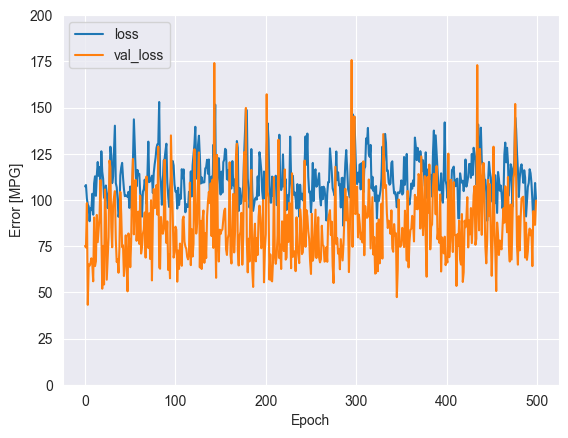

In [73]:
plot_loss(history)

In [75]:
test_results['linear_model'] = linear_model.evaluate(
test_features, test_labels, verbose=0)